## PROBLEM STATEMENT:

Restaurants from all over the world can be found here in Bengaluru. From the United States to Japan, Russia to Antarctica, you get all types of cuisines here. Delivery, Dine-out, Pubs, Bars, Drinks, Buffet, Desserts you name it and Bengaluru has it. Bengaluru is the best place for foodies. The number of restaurants is increasing day by day. Currently, it stands at approximately 12,000 restaurants. With such a high number of restaurants. This industry hasn't been saturated yet. And new restaurants are opening every day. However, it has become difficult for them to compete with already established restaurants. The key issues that continue to pose a challenge to them include high real estate costs, rising food costs, shortage of quality manpower, fragmented supply chain, and over-licensing. This Zomato data aims at analyzing the demography of the location. Most importantly it will help new restaurants in deciding their theme, menus, cuisine, cost, etc for a particular location. It also aims at finding similarities between neighborhoods of Bengaluru on the basis of food. The dataset also contains reviews for each of the restaurants which will help in finding the overall rating for the place.


## 1.Import libraries that you required and Load the data set.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('Zomoto.CSV')

In [7]:
df

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2/5,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
1,43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6 /5,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,"1,700","[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road
2,16032,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7/5,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR
3,51635,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4 /5,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
4,23424,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,NEW,0,+91 9901979901,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400,[],[],Dine-out,JP Nagar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26497,https://www.zomato.com/bangalore/asia-kitchen-...,"136, Ground Floor, 1st Cross, 5th Block, Jyoti...",Asia Kitchen By Mainland China,Yes,Yes,4.9/5,2215,080 49652573,Koramangala 5th Block,"Casual Dining, Bar","Chicken Dim Sum, Pad Thai Noodle, Jumbo Prawns...","Asian, Chinese, Thai, Momos","1,500","[('Rated 5.0', ""RATED\n Everything from the a...",[],Buffet,Koramangala 4th Block
9996,45520,https://www.zomato.com/bangalore/24-hours-cake...,"Shop 1, ATR Complex, Old Airport Road, Bangalore",24 Hours Cake Delivery,No,No,3.3 /5,4,+91 9711655952,Old Airport Road,Delivery,NaN,Bakery,700,"[('Rated 1.0', 'RATED\n Very unprofessional b...",[],Desserts,Old Airport Road
9997,41541,https://www.zomato.com/bangalore/tbc-sky-loung...,"36/1, 5th Floor, Berry's Hotel Kadubeesanahall...",TBC- Sky Lounge,No,Yes,4.4 /5,619,080 42106712\n+91 7624959444,Marathahalli,"Casual Dining, Bar","Fish, Peri Peri Chicken, Cocktails, Chilli Chi...","Continental, Asian, Italian, North Indian","1,000","[('Rated 2.0', 'RATED\n The high rating on Zo...",[],Dine-out,Marathahalli
9998,35621,https://www.zomato.com/bangalore/tawa-sagara-j...,"29/1, 30th Cross, 4th T Block, Thilknagar, Jay...",Tawa Sagara,No,No,3.8 /5,122,NaN,Jayanagar,Casual Dining,"Sea Food, Biryani, Fish Thali, Neer Dosa, Murg...","Mangalorean, Seafood",NaN,"[('Rated 1.0', 'RATED\n We orders chicken suk...",[],Delivery,Koramangala 7th Block


In [8]:
# removing the duplicates
duplicate_row=df[df.duplicated()]

duplicated_row_label=df[df.duplicated()].index

df.drop(index=duplicated_row_label,inplace=True)


In [9]:
# renaming the column
df.rename(columns={'Unnamed: 0': 'restaurant_id'},inplace=True)

In [10]:
df['restaurant_id']

0       14221
1       43422
2       16032
3       51635
4       23424
        ...  
9993    47608
9994     7255
9997    41541
9998    35621
9999    27432
Name: restaurant_id, Length: 9091, dtype: int64

In [11]:
df.head(2)

,restaurant_id,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2/5,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
1,43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6 /5,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,"1,700","[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road


## 2.Which are the top restaurant chains based on the distribution(frequency) in Bangaluru?

In [12]:
df['name'].value_counts().head(10)

Cafe Coffee Day              17
McDonald's                   16
Baskin Robbins               16
Onesta                       15
Keventers                    15
Petoo                        14
KFC                          14
The Chocolate Heaven         14
Corner House Ice Cream       13
SGS Non Veg - Gundu Pulav    13
Name: name, dtype: int64

## 3.	How many restaurants do not accept online orders?

In [13]:
len(df[df['online_order']=='No'])

3668

## 4.What is the ratio b/w restaurants that provide and do not provide table booking?

In [14]:
df['book_table'].value_counts(normalize=True)*100

No     87.636124
Yes    12.363876
Name: book_table, dtype: float64

## 5.	Use a boxplot on the rating column. Use User Defined Function or Lambda function or Apply function to extract the data that comes before /. Kindly exclude /.

In [15]:
def rating (x):
    if pd.isnull(x):
        pass
    elif x=='NEW':
        x=np.nan
    elif x=='-':
        x=np.nan
       
    else:
        a=x.split('/')
        x=a[0]
    return x
df['rating']=df['rate'].apply(rating).astype(float)
df.head()


,restaurant_id,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rating
0,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2/5,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City,3.2
1,43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6 /5,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,"1,700","[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road,3.6
2,16032,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7/5,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR,3.7
3,51635,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4 /5,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield,3.4
4,23424,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,NEW,0,+91 9901979901,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400,[],[],Dine-out,JP Nagar,NaN


<AxesSubplot:xlabel='rating'>

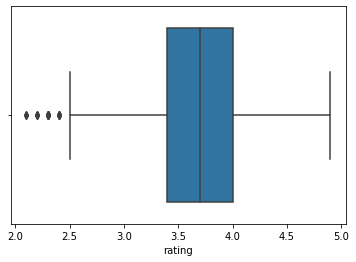

In [16]:
sns.boxplot(x=df['rating'])

## 6.	Online and Offline orders restaurants percentage.

In [17]:
a=df['online_order'].value_counts(normalize=True)*100
a

Yes    59.652403
No     40.347597
Name: online_order, dtype: float64

In [18]:
print(f'''Online order percentage - {a['Yes']} %''')
print(f'''Offline order percentage - {a['No']} %''')

Online order percentage - 59.652403475965244 %
Offline order percentage - 40.34759652403476 %


## 7.	 Plot the scatter plot using the Cost vs rating variable with respect to online order. Use apply the function Or other function to remove the “,”.

In [19]:
df['cost']=df['approx_cost(for two people)'].str.replace(',','').astype(float)

<AxesSubplot:xlabel='cost', ylabel='rating'>

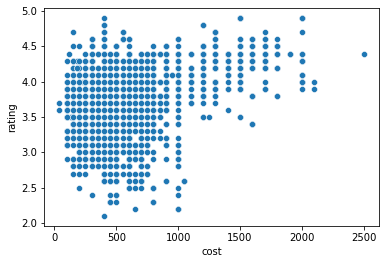

In [20]:
sns.scatterplot(x=df[df['online_order']=='Yes']['cost'],y=df[df['online_order']=='Yes']['rating'])

## 8.	Find the distribution of the votes and Approx_cost using a user-defined function and for a loop

<AxesSubplot:xlabel='cost', ylabel='votes'>

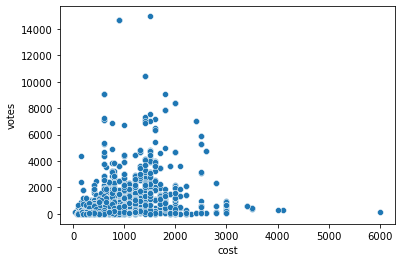

In [21]:
sns.scatterplot(y=df['votes'],x=df['cost'])

## 9.	Which are the most common restaurant type in Banglore?

In [22]:
df['rest_type'].value_counts().head(10)

Quick Bites           3296
Casual Dining         1834
Cafe                   644
Delivery               455
Dessert Parlor         409
Takeaway, Delivery     395
Bakery                 205
Casual Dining, Bar     190
Beverage Shop          140
Bar                    120
Name: rest_type, dtype: int64

## 10.	Is there any difference b/w the votes of restaurants accepting and not accepting online orders?

In [23]:
difference=df.groupby('online_order')['votes'].sum()
difference

online_order
No     1030499
Yes    1635259
Name: votes, dtype: int64

In [24]:
print(f'''the difference between them is {difference['Yes']-difference['No']}''')

the difference between them is 604760


<AxesSubplot:xlabel='online_order'>

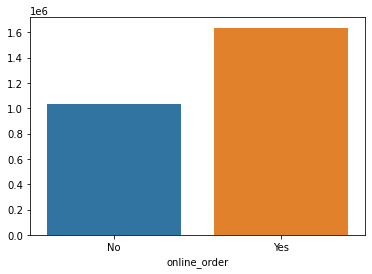

In [25]:
sns.barplot(x=difference.index,y=difference.values)

## 11.	Which are the most common restaurant type in Banglore?

In [26]:
df['rest_type'].value_counts().head(10)

Quick Bites           3296
Casual Dining         1834
Cafe                   644
Delivery               455
Dessert Parlor         409
Takeaway, Delivery     395
Bakery                 205
Casual Dining, Bar     190
Beverage Shop          140
Bar                    120
Name: rest_type, dtype: int64

## 12.	Find the Best budget Restaurants in any location.

In [27]:
a=df[['location','restaurant_id','name','cost']]
a['rank']=a.groupby('location')['cost'].rank(method='dense')


C:\Users\KHUSHI\AppData\Local\Temp\ipykernel_40956\2309389741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['rank']=a.groupby('location')['cost'].rank(method='dense')


In [28]:
b=a[a['rank']<=1]
b.sort_values('location')

,location,restaurant_id,name,cost,rank
485,BTM,10649,Nellore Dosa Camp,70.0,1.0
7345,BTM,10544,Namaste,70.0,1.0
6658,Banashankari,632,Taaza Thindi,100.0,1.0
7791,Banashankari,3714,Foodlieious Multi Cuisine,100.0,1.0
2250,Banashankari,122,Coffee Bytes,100.0,1.0
...,...,...,...,...,...
214,Yelahanka,40352,Prashanth Naati Corner,300.0,1.0
6115,Yeshwantpur,40400,Ambur Darbar Biriyani Point,200.0,1.0
3395,Yeshwantpur,39661,Ambur Darbar Biriyani Point,200.0,1.0
5099,Yeshwantpur,44619,Om Sai Ram Food Junction,200.0,1.0


## 13.	Top quick bites restaurant chains in Banglore.

In [29]:
quick_bites=df[df['rest_type']=='Quick Bites']

In [30]:
qb=quick_bites.sort_values(by='rating',ascending=False)
qb[['restaurant_id','name','rest_type','rating',]].head(10)

,restaurant_id,name,rest_type,rating
5605,39518,CTR,Quick Bites,4.7
6658,632,Taaza Thindi,Quick Bites,4.7
7838,6553,Chikkanna Tiffin Room,Quick Bites,4.5
8775,46436,Veena Stores,Quick Bites,4.5
2500,5846,GMT - Gelateria Montecatini Terme,Quick Bites,4.4
2045,19049,Le Casse CroÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ»te,Quick Bites,4.4
4894,14992,The Bundle Co.,Quick Bites,4.4
1075,43532,Siddiqu Kabab Center,Quick Bites,4.4
8750,3514,Bengaluru Cafe,Quick Bites,4.4
7961,12329,The Bundle Co.,Quick Bites,4.4


## 14.	Which are the most popular casual dining restaurant chains, Make use of any plot related to this question?

In [31]:
df_casual=df[df["rest_type"] == "Casual Dining"].loc[:,['name','rating']]
df_casual_bar=df_casual.groupby('name').mean().sort_values(by="rating", ascending=False)
df_casual_bar.reset_index(inplace=True)

<AxesSubplot:xlabel='name', ylabel='rating'>

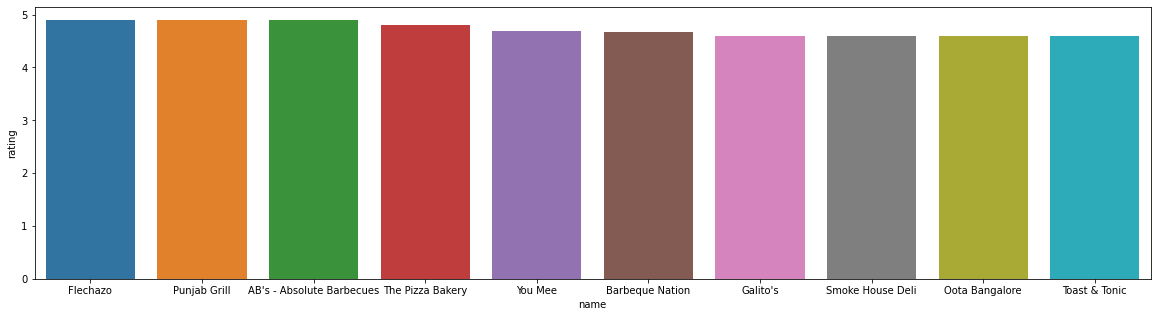

In [46]:
plt.figure(figsize=(20,5))
sns.barplot(data=df_casual_bar.head(10),x="name",y="rating")

## 15.	Which are the most popular cuisines of Bangalore using a related plot?

In [59]:
popular_cuisines=df['cuisines'].value_counts(ascending=False)
c=popular_cuisines.head(10)
c

North Indian                           474
North Indian, Chinese                  407
South Indian                           324
Bakery, Desserts                       181
Biryani                                146
South Indian, North Indian, Chinese    132
Desserts                               119
Cafe                                   116
Fast Food                              114
Bakery                                 105
Name: cuisines, dtype: int64

<AxesSubplot:>

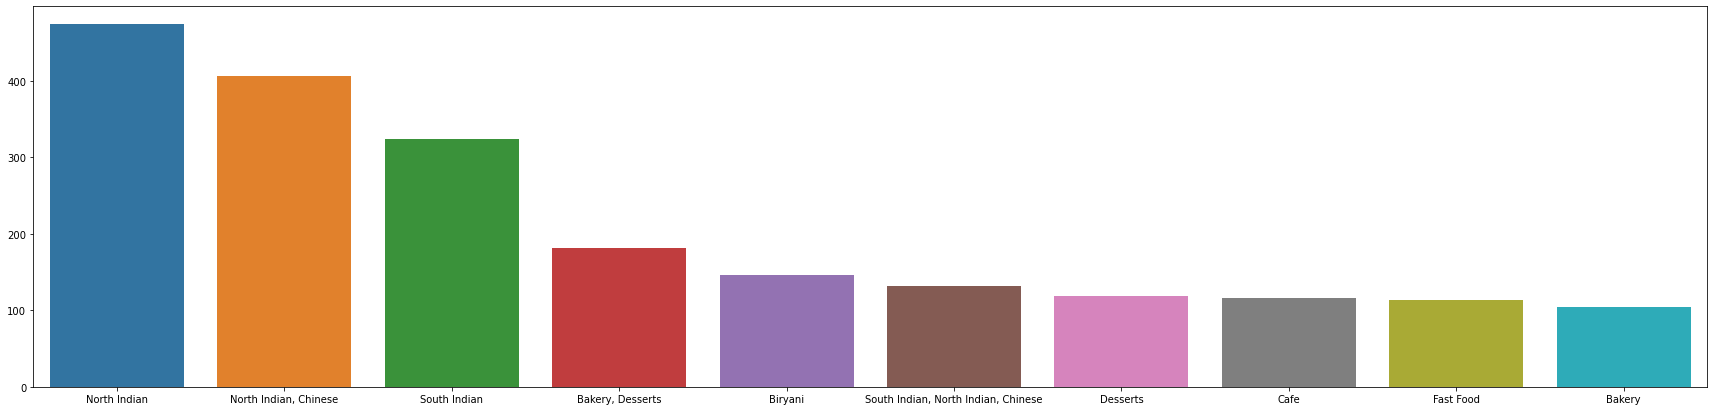

In [60]:
plt.figure(figsize = (30,7))
sns.barplot(x=c.index,y=c.values)